# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:

* Understand the challenges of information retrieval on Wikipedia articles
* Weighted kNN algorithm for relevance feedback 
* Rocchio algorithm for relevance feedback 

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/aiml_batch_14/rocchios_algorithm.mp4" type="video/mp4">
</video>
""")

## Dataset

### History:
Wikipedia dataset is the most widely-used dataset for information retrieval. It is based on Wikipedia’s "featured articles", a continually updated article collection. There are totally 29 categories in "featured articles". Each article is split into several sections according to its section headings. This dataset is finally generated as a set of 2,866 image/text pairs.

As an important benchmark dataset for information retrieval, The wikipedia dataset has been widely used since being publicly available.

**Wikipedia featured articles:**

Featured articles are considered to be some of the best articles Wikipedia has to offer, as determined by Wikipedia's editors. They are used by editors as examples for writing other articles. Articles are reviewed as featured article candidates for accuracy, neutrality, completeness, and style, before being added to . There are 5,410 featured articles out of 5,754,701 articles on the English Wikipedia (~0.1% are featured).

### Description:

The dataset contains the following:
1. 2866 Wikipedia articles belonging to a total of 29 categories.
2. Each article is given a query ID based on it's category.
    



### Challenges:

The following challenges are associated with query based retrieval of documents:

1.   Incomplete query or semantically wrong query
2.   Huge number of documents returns as a result to the query

## Domain Information



Information Retrieval (IR) systems allow users to access large amounts of data. A user submitting a request to an IR system will receive a number of results relating to the request. The results may include images, pieces of text,
web pages, segments of video or speech samples. 

But, the users may not have a well-developed idea of what information they are searching for, they may not be able to express entirely what they want into a suitable query and they may not have a good idea of what information is available for retrieval. 

To solve the above problem, the system after presenting the user with an initial set of documents a feedback mechanism could identify those documents that had useful information. This is the Relevance Feedback (RF). The system then can use this information quantitatively - retrieving more documents like the relevant documents - and qualitatively - retrieving only those documents similar to the relevant documents. Therefore RF is a cycle.

The image below helps us understand the Relevance Feedback cycle:

<img src = "
https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/1.1.png" width = "700" height = "500">

## AI / ML Technique

### Relevance Feedback for Information Retrieval

In this experiment, dataset is queried to get relevant documents. The significant part of any Information retrieval system is to make it responsive to user interaction. Hence our system needs to incorporate the feedback and refine the results using the feedback on the fly.

Search engines like Google, Bing and other websites like Youtube are use - cases which personalize the content for  better user experience.

In this experiment we implement two algorithms to achieve adaptive retrieval based on user input.

Below steps are specific to this experiment. In the real-word, based on the usecase, few or all of these steps can be applied.

1. #### Weighted kNN 

     The steps are:

    - Random list of wikipedia documents (varied category) are displayed to the User. 
    - The user based on his interest clicks on any document belonging to a particular category. 
    - We implement a weighted kNN to get a ranking of the relevant documents based on the user input.
    - The user then again clicks a document of the relevant documents.
    - We update the weight vector to get a new ranking which ensures better recall than before


2. #### Rocchio Algorithm

     The steps are:
      
    - Random list of documents are displayed.
    - The user clicks on a particular document and also decides the relevant and non relevant documents of the displayed ones.
    - The initial document clicked is our Query $q$ (initial centroid for relevant documents). <br> Relevant Documents are $D_{r}$, Non relevant ones are $D_{nr}$.
    - We use the following formula to converge to a new centroid for the relevant documents.<br> This ensures better precision with every iteration

$$q_{t+1} = a . q_{t} + b. (\frac{1}{|D_{r}|} \sum_{d_{j} \in D_{r}} d_{j}) - c. (\frac{1}{|D_{nr}|} \sum_{d_{k} \in D_{nr}} d_{k})$$

- Display the nearest neighbours of the new centroid $q_{t+1}$, which would be more relevant



### Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U3W16_38_Rocchios_Algorithm_B" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week12/Exp1/wikipedia_dataset.tar.gz")
    ipython.magic("sx pip install lxml")
    ipython.magic("sx tar xvf  wikipedia_dataset.tar.gz")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print ("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
from glob import glob
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from bs4 import BeautifulSoup as Soup
from sklearn.neighbors import NearestNeighbors
import pandas as pd

from IPython.display import clear_output
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [5]:
f = open('wikipedia_dataset/categories_originalids.list')
cat = f.readlines()
print('The following ' + str(len(cat)) + ' categories', cat)

The following 29 categories ['Art, architecture and archaeology\n', 'Awards, decorations and vexillology\n', 'Biology\n', 'Business, economics and finance\n', 'Chemistry and mineralogy\n', 'Computing\n', 'Culture and society\n', 'Education\n', 'Engineering and technology\n', 'Food and drink\n', 'Geography and places\n', 'Geology, geophysics and meteorology\n', 'Health and medicine \n', 'History\n', 'Language and linguistics\n', 'Law\n', 'Literature and theatre\n', 'Mathematics\n', 'Media\n', 'Music\n', 'Philosophy and psychology\n', 'Physics and astronomy\n', 'Politics and government\n', 'Religion, mysticism and mythology\n', 'Royalty, nobility and heraldry\n', 'Sport and recreation\n', 'Transport\n', 'Video gaming\n', 'Warfare \n']


### Parsing the XML data files 

In [6]:
def parseLog(file, docs, qid):
    # Read the file
    handler = open(file).read()
    # To the Soup method pass the data to be parsed and the name of a parser 'lxml' as parameters
    soup = Soup(handler,'lxml')
    # Finding the text
    txt = soup.findAll('text')[0].text       
    for message in soup.findAll('document'):
        # message.attrs attribute, which returns a dictionary of key-value pairs
        msg_attrs = dict(message.attrs)

        qid.append(int(msg_attrs['cat']))
        docs.append(msg_attrs['name'] + ' ' + txt)

lis = glob('wikipedia_dataset/texts/*')
docs = []
qid = []
for i in range(len(lis)):
    parseLog(lis[i], docs, qid)

In [7]:
print('Sample document:', qid[100], docs[100][:100] + '...')

Sample document: 11 Australia 
The name ''Australia'' is derived from the Latin ''australis'', meaning "southern". Legen...


### Construct feature vector from documents

In [8]:
stoplist = open('wikipedia_dataset/stopwords.txt').read().splitlines()

In [9]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words=stoplist, min_df=0.001)
matrix = vectorizer.fit_transform(docs)
doc_vectors = matrix.todense()
doc_vectors = np.array(doc_vectors)
vocab = vectorizer.vocabulary_

In [10]:
print('Length of the vocabulary:', len(vocab))
print('A sample ' +str(len(vocab)) +' dimensional document vector:', doc_vectors[2][:100])

Length of the vocabulary: 24841
A sample 24841 dimensional document vector: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02409848 0.         0.
 0.         0.         0.         0.         0.03397498 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02006442 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04380035 0.         0.   

In [11]:
print(doc_vectors.shape, len(qid))

(2866, 24841) 2866


### 1. Weighted KNN 
- Initially display random 20 documents and get user click
- Run the KNN Algorithm and chose 100 nearest neighbours
- Define a weight matrix to get the ranking of the 100 relevent vectors based on similarity

Given $m$ - dimensional query $q$ and document $d_{i}$, the weighted similarity is calculated as follows <br> 
$q = (q_{1}, q_{2}, \cdots, q_{m})$ <br>
$d_{i} = (d_{1}, d_{2}, \cdots, c_{m})$ <br>
$$Similarity = w^T d'_{i}$$ where ,
$$d'_{i} = \frac{q * d_{i}}{\parallel q \parallel \parallel d_{i} \parallel}  $$

In [12]:
# Fit KNN
KNN = NearestNeighbors(100, metric = 'cosine')
KNN.fit(doc_vectors)
neighbours = KNN.kneighbors(doc_vectors,return_distance=False)
print(neighbours.shape)

(2866, 100)


In [13]:
# Number of articles to be displayed 
num = 10

,index,Article,category
0,907,"Bruce_Castle \nSarah Hare died in 1692 and was buried in Westminster Abbey, and Hare in 1708, to be s","Art, architecture and archaeology"
1,720,Ancient_Egyptian_literature \nThe funerary stone slab stela was first produced during the early Old K,Literature and theatre
2,601,The_Hitchhiker's_Guide_to_the_Galaxy_(radio_series) \nDouglas Adams had contributed comedy sketches f,Media
3,1752,The_Power_of_Nightmares \nThe final episode addresses the actual rise of al-Qaeda. Curtis argues that,Media
4,2232,Amateur_radio_direction_finding \nARDF transmitters have a low power output and operate in either the,Sport and recreation
5,2026,"Styracosaurus \nThe first fossil remains of ''Styracosaurus'' were collected in Alberta, Canada by C.",Biology
6,620,"Shen_Kuo \nShen Kuo wrote that during the Qingli reign period (1041–1048), under Emperor Renzong of S",History
7,2689,Act_of_Independence_of_Lithuania \nThe Act of February 16 proclaimed the ''re''-establishment (''atst,History
8,867,"AHS_Centaur \nAt the beginning of 1943, ''Centaur'' was placed at the disposal of the Australian Depa",Warfare
9,1358,"Lazare_Ponticelli \nUntil his death, Ponticelli lived with his daughter in the Paris suburb of Le Kre",Warfare


Select the index of the article you would like to read or type 'stop' if you want to end the searchstop
Enjoy your Article


Text(0, 0.5, 'Score given by you')

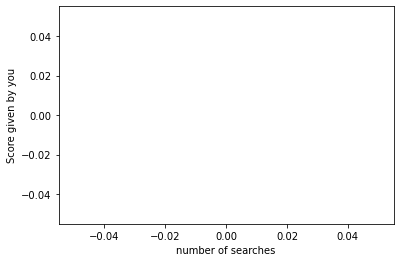

In [17]:
def to_display(doc_ids, init= False):
    if init == True:
        ix = random.sample(range(0, len(doc_vectors)), num)
    else:
        ix = doc_ids
    
    df = pd.DataFrame(columns=['index', 'Article','category'])
    df['index'] = ix
    df['Article'] = [docs[i][:100] for i in ix]
    df['category'] = [cat[qid[i]-1][:-1] for i in ix] 
    clear_output()
    display(HTML(df.to_html()))
    return ix

index = to_display([],init= True)
res = []
ctr = 0

# Initialize the weight vector to ones
weights = np.ones((doc_vectors.shape[1],1))
while (True):   
    doc_id = input("Select the index of the article you would like to read or type 'stop' if you want to end the search")
    if doc_id == 'stop':
        break    
    doc_id = int(doc_id) 

    query_doc = doc_vectors[doc_id].reshape(1, doc_vectors.shape[1])
    relevant_docs_ix = neighbours[doc_id]
    relevant_docs = doc_vectors[relevant_docs_ix]

    # Calculate Similarity
    
    
    # YOUR CODE HERE : Find the new relavance using the formula above in the weighted KNN
    new_relevance =  (query_doc[0] * relevant_docs) / (np.linalg.norm(relevant_docs) * np.linalg.norm(query_doc))

    # YOUR CODE HERE use np.matmul to find the similarity score using 'new_relavance' and the 'weights'
    similarity  = np.matmul(new_relevance , weights)

    # Return the num most ranked doc ids
    ranked_docs_ix = relevant_docs_ix[np.argsort(similarity[:,0])]
    index = to_display(ranked_docs_ix[:num])

    # YOUR CODE HERE: Add more weight to the selected article above; irrespective of how close it was w.r.t the similarity above
    weights = relevant_docs_ix[np.argsort(similarity[:,0])]
    
    # YOUR CODE HERE; Normalize the weights.
    weights = weights/ np.linalg.norm(weights) 
    ctr += 1
    res_ = input("Give the precision count\a number between 1-10 about how satisfied are you with the results")
    res.append(res_)

print('Enjoy your Article')
plt.plot(res)
plt.xlabel("number of searches")
plt.ylabel("Score given by you")

### 2. Rocchio Algorithm
- Initially random articles are displayed
- Select an index value based on your choice
- Select all the indices of relevant documents
- Update the centroid of relevant vector as shown in the formula above
- Display the nearest neighbours of the relavant vector

- $alpha$- how close to relevant 
- $beta$ - how far from non relevant

Ideally we would like to have high $alpha$ and low $beta$

In [16]:
alpha = 1.0
beta = 0.5
index = to_display([],init= True)
while(True):
    doc_id = input("Select the index of the article you would like to read or type 'stop' if you want end the search")
    if doc_id == 'stop':
        break
    print("Enter the indices, comma separated for relevant documents")
    R = [int(x) for x in input().split(',')]
    NR = [i for i in index if i not in R]
    doc_id = int(doc_id)
    query_doc = doc_vectors[doc_id].reshape(1, doc_vectors.shape[1])
    R_docs = doc_vectors[R]
    NR_docs = doc_vectors[NR]

    # YOUR CODE HERE: Find the new query using the Rocchio's Algorithm formula defined above
    q_new = query_doc + (alpha * np.sum(R_docs, 0)/len(R)) - (beta * np.sum(NR_docs, 0)/len(NR))
    print(q_new.shape)
    # YOUR CODE HERE: Return the KNN for the new query
    retrieved = KNN.kneighbors(q_new, return_distance=False)
    index = to_display(retrieved[0][:num])
    
print('Enjoy your article')

,index,Article,category
0,433,"Ice_hockey_at_the_Olympic_Games \nAt the 1984 Winter Olympics in Sarajevo, Yugoslavia, the Soviet Uni",Sport and recreation
1,1055,"Ice_hockey_at_the_Olympic_Games \nThe Soviet Union competed in its first World Championship in 1954,",Sport and recreation
2,272,"Olivier_Messiaen \nIn 1952, Messiaen was asked to provide a test piece for flautists wishing to enter",Music
3,619,"S.H.E \nS.H.E has released twelve studio albums to date, including three compilation album and one wh",Music
4,305,Ice_hockey_at_the_Olympic_Games \nThe men's tournament held at the 1920 Summer Olympics was organised,Sport and recreation
5,1136,"Ice_hockey_at_the_Olympic_Games \nThe Winter Olympics returned to Lake Placid, New York in 1980. Twel",Sport and recreation
6,1248,"Ice_hockey_at_the_Olympic_Games \nBefore 1998, women's hockey had been dominated by Canada. Canadian",Sport and recreation
7,1114,"Joe_Sakic \nSakic had an extensive international hockey career, representing Canada at seven internat",Sport and recreation
8,2548,"Olivier_Messiaen \nMessiaen's special relationship with the organ began in autumn 1927, when he joine",Music
9,387,"Olivier_Messiaen \nMessiaen's music has been described as outside the western musical tradition, alth",Music


Select the index of the article you would like to read or type 'stop' if you want end the searchstop
Enjoy your article


### Please answer the questions below to complete the experiment:

In [18]:
#@title In Rocchio Algorithm, the 'beta'(consider 'beta' as used in explanations provided in this notebook) parameter determines how close one is to the relevant documents? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE","FALSE"]


In [19]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [21]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "121" #@param {type:"string"}


In [22]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [23]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [25]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 12766
Date of submission:  02 Jan 2021
Time of submission:  07:32:30
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
